
#### Generative Adversial Network(GAN)
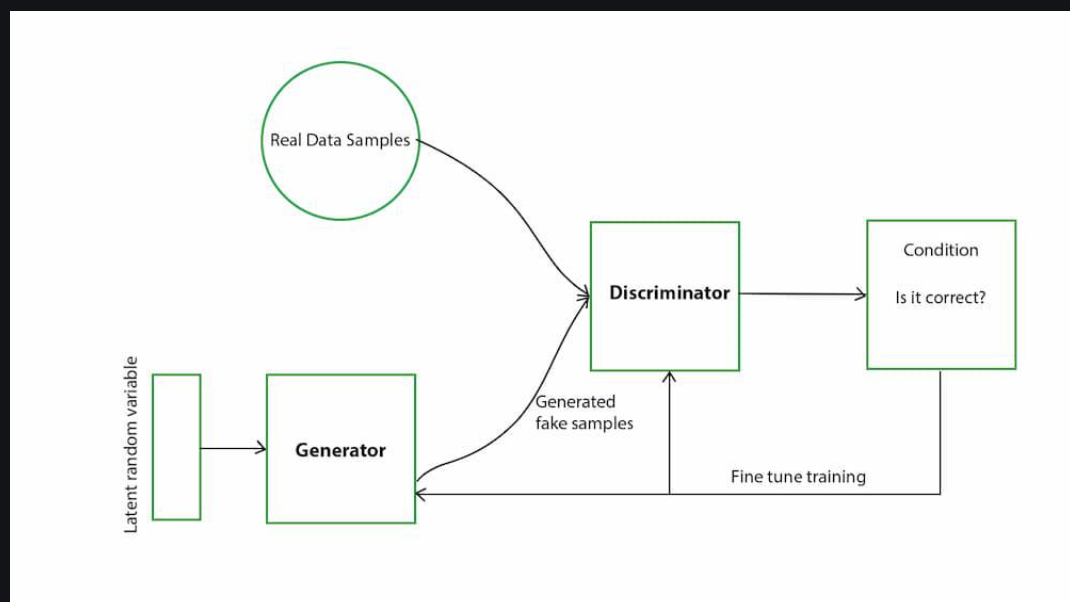
1. Goal : Building a GAN to generate fashion
2. Steps involved in building a GAN:
   1. Load the data :
      * Leverage tensorflow dataset api :tfds : Use fashion_mnist dataset (contains images of T-shirt, shoes..)
      https://www.tensorflow.org/datasets/catalog/fashion_mnist
   2. Build Generator : Take a bunch of random numbers (latent dimensions). Outputs a set of values that represent an image.
      * Generator gets rewarded if its able to fool the discriminator.
      * Balance off the training between Generator and Discriminator.
      * Keras allows us to create a custom train step, through which we can build our custom training loop which allows us to build a generator.
   3. Train Discriminator: It gets rewarded if it effectively picks up thing.
   

### Working of GANs
Here's how GANs work:

Generator (G): The generator takes random noise as input and generates synthetic data that ideally resembles the real data. The goal is to create data that is indistinguishable from real data.

Discriminator (D): The discriminator evaluates input data and classifies it as either real (from the actual dataset) or fake (generated by the generator). Its goal is to correctly distinguish between real and fake data.

Training Process:

The generator and discriminator are trained simultaneously through an adversarial process.
The generator tries to improve its ability to generate realistic data to fool the discriminator.
The discriminator, in turn, aims to become better at distinguishing between real and generated data.
Feedback Loop:

As training progresses, the generator gets better at generating realistic data.
The discriminator improves its ability to distinguish real from fake data.
This creates a feedback loop where both networks continually improve their performance.
Equilibrium (Ideal Outcome):

In an ideal scenario, the generator creates data that is so realistic that the discriminator cannot differentiate between real and generated samples.

# 1. Import Dependencies and Data

In [1]:
!pip install tensorflow tensorflow gpu matplotlib tensorflow datasets ipywidgets

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [2]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  # Looping through each gpu and setting up memory_growth=True that will prevent blowing up our RAM
  tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
# Bringing in tensorflow datasets for fashion_mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [4]:
# Use the tensorflow datasets API to bring in the data source
ds = tfds.load('fashion_mnist',split='train') #specify that we only want the training partition

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJNUZ4L/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJNUZ4L/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next().keys() #returns a dictionary

dict_keys(['image', 'label'])

### 2. Visualize images and build Data Pipeline

In [6]:
#Do some data transformation
import numpy as np

In [7]:
# Set up connections aka iterator
dataiterator = ds.as_numpy_iterator()

In [8]:
#Getting data out of pipeline
dataiterator.next()
# Continuosly bring back a batch : Btach up a dataset to get multiple samples per batch
# Bringing back a new dataset each time we run this cell

# Not loading into memory but making a call and bringing back data as and when we need that helps preserve memory

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [9]:
#We have to condense this image
np.squeeze(dataiterator.next()['image']).shape


(28, 28)

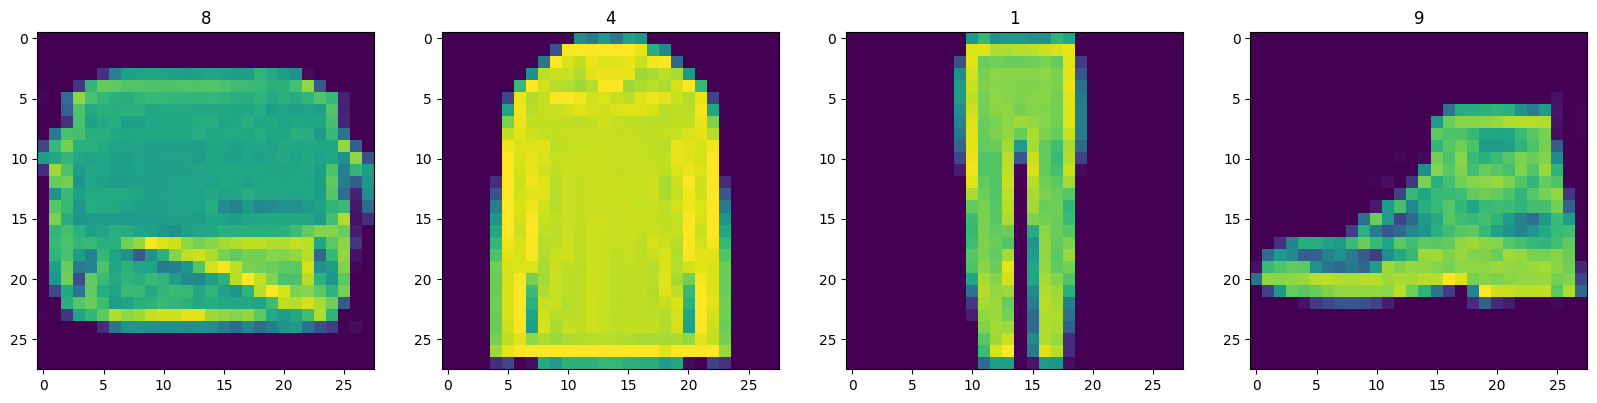

In [10]:
# Setting up the subplot formatting
# 4 columns , total plot : 20 by 20 pixels
#ax : each of the individual subplots
fig, ax = plt.subplots(ncols=4 , figsize =(20,20))
# Loop 4 times and get images
for idx in range(4): # looping through 4 individual images from our data iterator
  # Grab an image and label
  sample = dataiterator.next() # Getting one sample : comprising of 2 parts: the imge and the label
  # Plot the image using a specific axis/subplot
  ax[idx].imshow(np.squeeze(sample['image']))
  # Appending the image label as the plot
  ax[idx].title.set_text(sample['label'])

In [11]:
# Scaling up our images : from being values between 0 to 255 to 0 to 1
# Return image only
def scale_images(data):
  image = data['image']
  return image/255

In [12]:
# Steps involved while building a data pipeline
# Reload the dataset
ds = tfds.load('fashion_mnist',split='train')
# 1. map
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# 2. Catche the dataset for that batch
ds = ds.cache()
# 3. Shuffle it up
ds = ds.shuffle(60000) # Specifying the shuffle buffer
# 4. Batch into 128 images per sample
ds = ds.batch(128)
# 5. prefetch
# Produces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [13]:
# Returns set of images 128 samples in length 28 by 28 by 1
ds.as_numpy_iterator().next().shape # Greyscaled image dims

(128, 28, 28, 1)

### Build Neural Network

##### 3.1 Import Modelling Components

In [14]:
# Bring in the sequential API for the generator and discriminator
# Generator takes random values and try to generate an image
# Discriminator takes in generated image and determine whether or not it is fake
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
# Reshape: Allows us to reshape what the output from previous layer looks like
# UpSampling2D : Used by generator to upsample the images and add in a little bit more depth or space to our image
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

##### 3.2 Build Generator

In [15]:
def build_generator():
  model = Sequential()
  # Define no. of inputs

  # fully connected layer
  # Takes in random values and reshapes it to 7*7*128
  # Beginning of a generated image
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2)) #activation function: to cater for non-linearities in our model
  model.add(Reshape((7,7,128))) # outputting an image of same shape as our data


  # Upsampling block 1
  # Double the spatial quality to 14*14*128
  model.add(UpSampling2D())
  # Condense the model, kernel size : 5*5
  # Adds parameters
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  # Upsampling block 2
  # outputting same size as output 28*28*128
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  # Convolutional block 1
  # Providing ability to pass through more parameters for our deep neural network to learn more or giving more idea of how output actually looks like
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  # activation: sigmoid: becaues we want our values to be between 0 & 1
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))


  return model

In [16]:
test_model = build_generator()

In [17]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [20]:
import numpy as np
# Generate 4 different random images
img = generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 8s 8s/step


array([[[[0.49567017],
         [0.5001582 ],
         [0.49599648],
         ...,
         [0.4915951 ],
         [0.49464726],
         [0.4971998 ]],

        [[0.49462485],
         [0.49342966],
         [0.48354253],
         ...,
         [0.4846244 ],
         [0.49068612],
         [0.49348202]],

        [[0.5114126 ],
         [0.49452576],
         [0.48254052],
         ...,
         [0.4895767 ],
         [0.49468687],
         [0.49387366]],

        ...,

        [[0.49567696],
         [0.49533984],
         [0.4879089 ],
         ...,
         [0.4899229 ],
         [0.49623686],
         [0.49542117]],

        [[0.49621254],
         [0.49734697],
         [0.49110633],
         ...,
         [0.4903992 ],
         [0.4967577 ],
         [0.49781862]],

        [[0.5004937 ],
         [0.5002321 ],
         [0.49596798],
         ...,
         [0.48875538],
         [0.49397415],
         [0.4970801 ]]],


       [[[0.49349067],
         [0.495108  ],
         [0.49

In [28]:
# Generating a new set of images
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 17ms/step


In [29]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 65ms/step


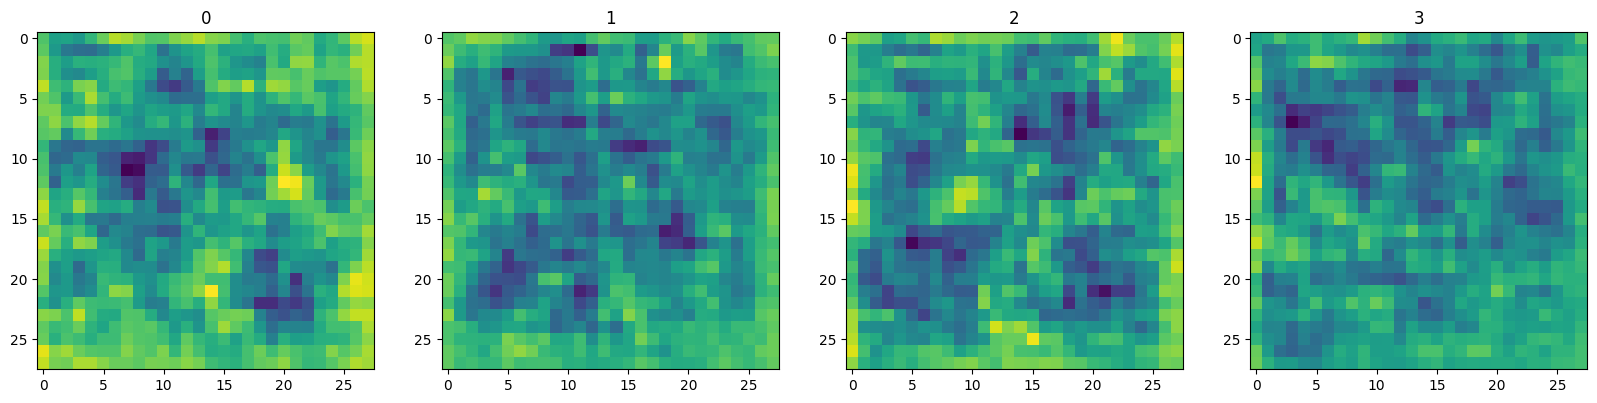

In [23]:
import matplotlib.pyplot as plt
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setting up the subplot formatting
# 4 columns , total plot : 20 by 20 pixels
#ax : each of the individual subplots
fig, ax = plt.subplots(ncols=4 , figsize =(20,20))
# Loop 4 times and get images
for idx, img in enumerate(img): # looping through 4 individual images from our data iterator
  # Plot the image using a specific axis/subplot
  ax[idx].imshow(np.squeeze(img)) # squueze values from 28*28*1 to 28*28
  # Appending the image label as the plot
  ax[idx].title.set_text(idx)

##### 3.3 Build Discriminator
Image classifier that is discriminating whether our image is real or fake

In [24]:
def build_discriminator():
  model = Sequential()

  #First Conv Block
  # Passing 32 filters having the shape of 5*5
  # input shape same as output shape of generator
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2)) # recommended when building GANs
  model.add(Dropout(0.4))

  # Second conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  # Third Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [25]:
discriminator = build_discriminator()

In [26]:
discriminator.summary() # outputs a single value between 0 & 1 to determine whether it's real or fake

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [30]:
discriminator.predict(img)

1/1 [==============================] - 0s 217ms/step


array([[0.49087614],
       [0.4909867 ],
       [0.4907686 ],
       [0.4910297 ]], dtype=float32)

In [31]:
img = img[0]

In [32]:
# Generating prediction on a single image

# Typically when we we are passing through a single image in our deep neural network it expects a batch number to be first
# Because it's a single value it's a single image in a batch so we need to pass through np.expand_dims
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 138ms/step


array([[0.49087614]], dtype=float32)

## 4.0 Custom Training Loops

Goal:
* To train both the generator and the discriminator simultaneously

* Finding a balance between the speed at which discriminator trains and the speed at which the generator is able to learn

* Ensure that discriminator doesn't train too fast so that it's able to smash out and identify a fake image every single time
  1. Inject some random noise into the outputs from the discriminator

Method:
* Defining our own training loop :changing what the fit function does by defining our own training step

##### 4.1 Setup Losses and Optimizers

In [33]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

#Rewarding our generator for tricking our discriminator and rewarding our discriminator for getting the right one

In [34]:
# Creating instances
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

##### 4.2 Build Subclassed Model

In [38]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))),tf.ones_like(tf.random.normal((6,128)))],axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [35]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [55]:
class FashionGAN(Model):
  # instantiate generator and discriminator then pass them to subclass model
  # *args : positional arguements
  # **kwargs : keyboard arguements
  # Pass through args and kwargs to base class
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args,**kwargs)

    #Setup attributes for generator and discriminator
    self.generator = generator
    self.discriminator = discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for losses and optimizers
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

    # Batch size: 128 images of size 28*28*1
  def train_step(self,batch):
    # Get the data
    real_images = batch
    # Generating random values thhat will be passed to our generator
    fake_images = self.generator(tf.random.normal((128,128,1)),training=False)

    # Train the discriminator
    # tf.GradientTape() function allows us to calculate all of the operations that are
    # happening by using our deep neural network
    with tf.GradientTape() as d_tape:

      # Pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      # Combining into one set of outputs
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

      # Create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # Add some noise to the TRUE outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))

      y_realfake += tf.concat([noise_real,noise_fake],axis=0)

      # Calculate loss - BINARYCROSS
      total_d_loss = self.d_loss(y_realfake,yhat_realfake)

    # Apply backpropogation - Allow neural network to Learn
    # Calculating gradient for each one of our trainable variables

    # Looking at gradients for each one of our trainbale variables and applying back propogation using our learning rate
    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))


    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate some new images
      gen_images = self.generator(tf.random.normal((128,128,1)),training=True)

      # Create the predicted labels
      predicted_labels = self.discriminator(gen_images, training=False)

      # Calculate loss - trick to training to fake out the discriminator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    # Apply back propogation
    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}



Another way to define a function
 - @tf.function
 - def train_step():
 - pass

In [56]:
# Create instance of subclassed model
fashgan = FashionGAN(generator,discriminator)

In [57]:
# Compile the model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

#### 4.3 Build Callback

In [58]:
import os # Helps with folder navigation
from tensorflow.keras.preprocessing.image import array_to_img
# Create our own custom callback on epoc end
from tensorflow.keras.callbacks import Callback

In [59]:
# Allow us. t save examples of our generated images
class ModelMonitor(Callback):
  # Pass no. of images that we want to generate and how big our latent dimension would be
  def __init__(self,num_img=3,latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images += 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

#### 4.3 Train

In [60]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [61]:
# Recommend 2000 epochs
hist = fashgan.fit(ds,epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 90s 167ms/step - d_loss: 0.4698 - g_loss: 1.4947
Epoch 2/20
469/469 [==============================] - 78s 167ms/step - d_loss: 0.6012 - g_loss: 1.2656
Epoch 3/20
469/469 [==============================] - 80s 171ms/step - d_loss: 0.6858 - g_loss: 0.6778
Epoch 4/20
469/469 [==============================] - 80s 170ms/step - d_loss: 0.6935 - g_loss: 0.6985
Epoch 5/20
469/469 [==============================] - 79s 169ms/step - d_loss: 0.6887 - g_loss: 0.7467
Epoch 6/20
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6787 - g_loss: 0.7679
Epoch 7/20
469/469 [==============================] - 80s 171ms/step - d_loss: 0.6846 - g_loss: 0.7805
Epoch 8/20
469/469 [==============================] - 80s 170ms/step - d_loss: 0.6032 - g_loss: 1.8538
Epoch 9/20
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6895 - g_loss: 0.7490
Epoch 10/20
469/469 [==============================] - 79s 168ms/step - d

#### 4.4 Review Performance

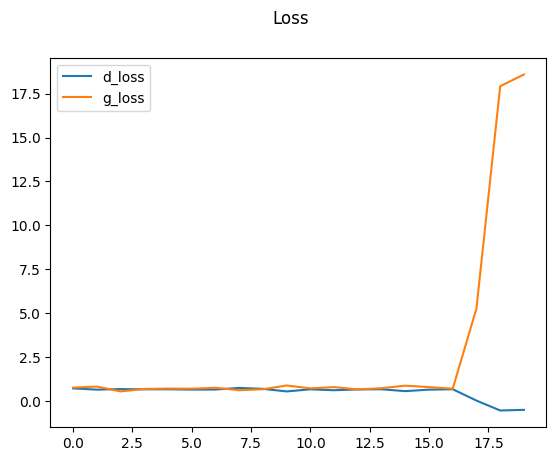

In [62]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

### 5. Test Out the Generator

#### 5.1 Generate the images

In [65]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))



1/1 [==============================] - 0s 284ms/step


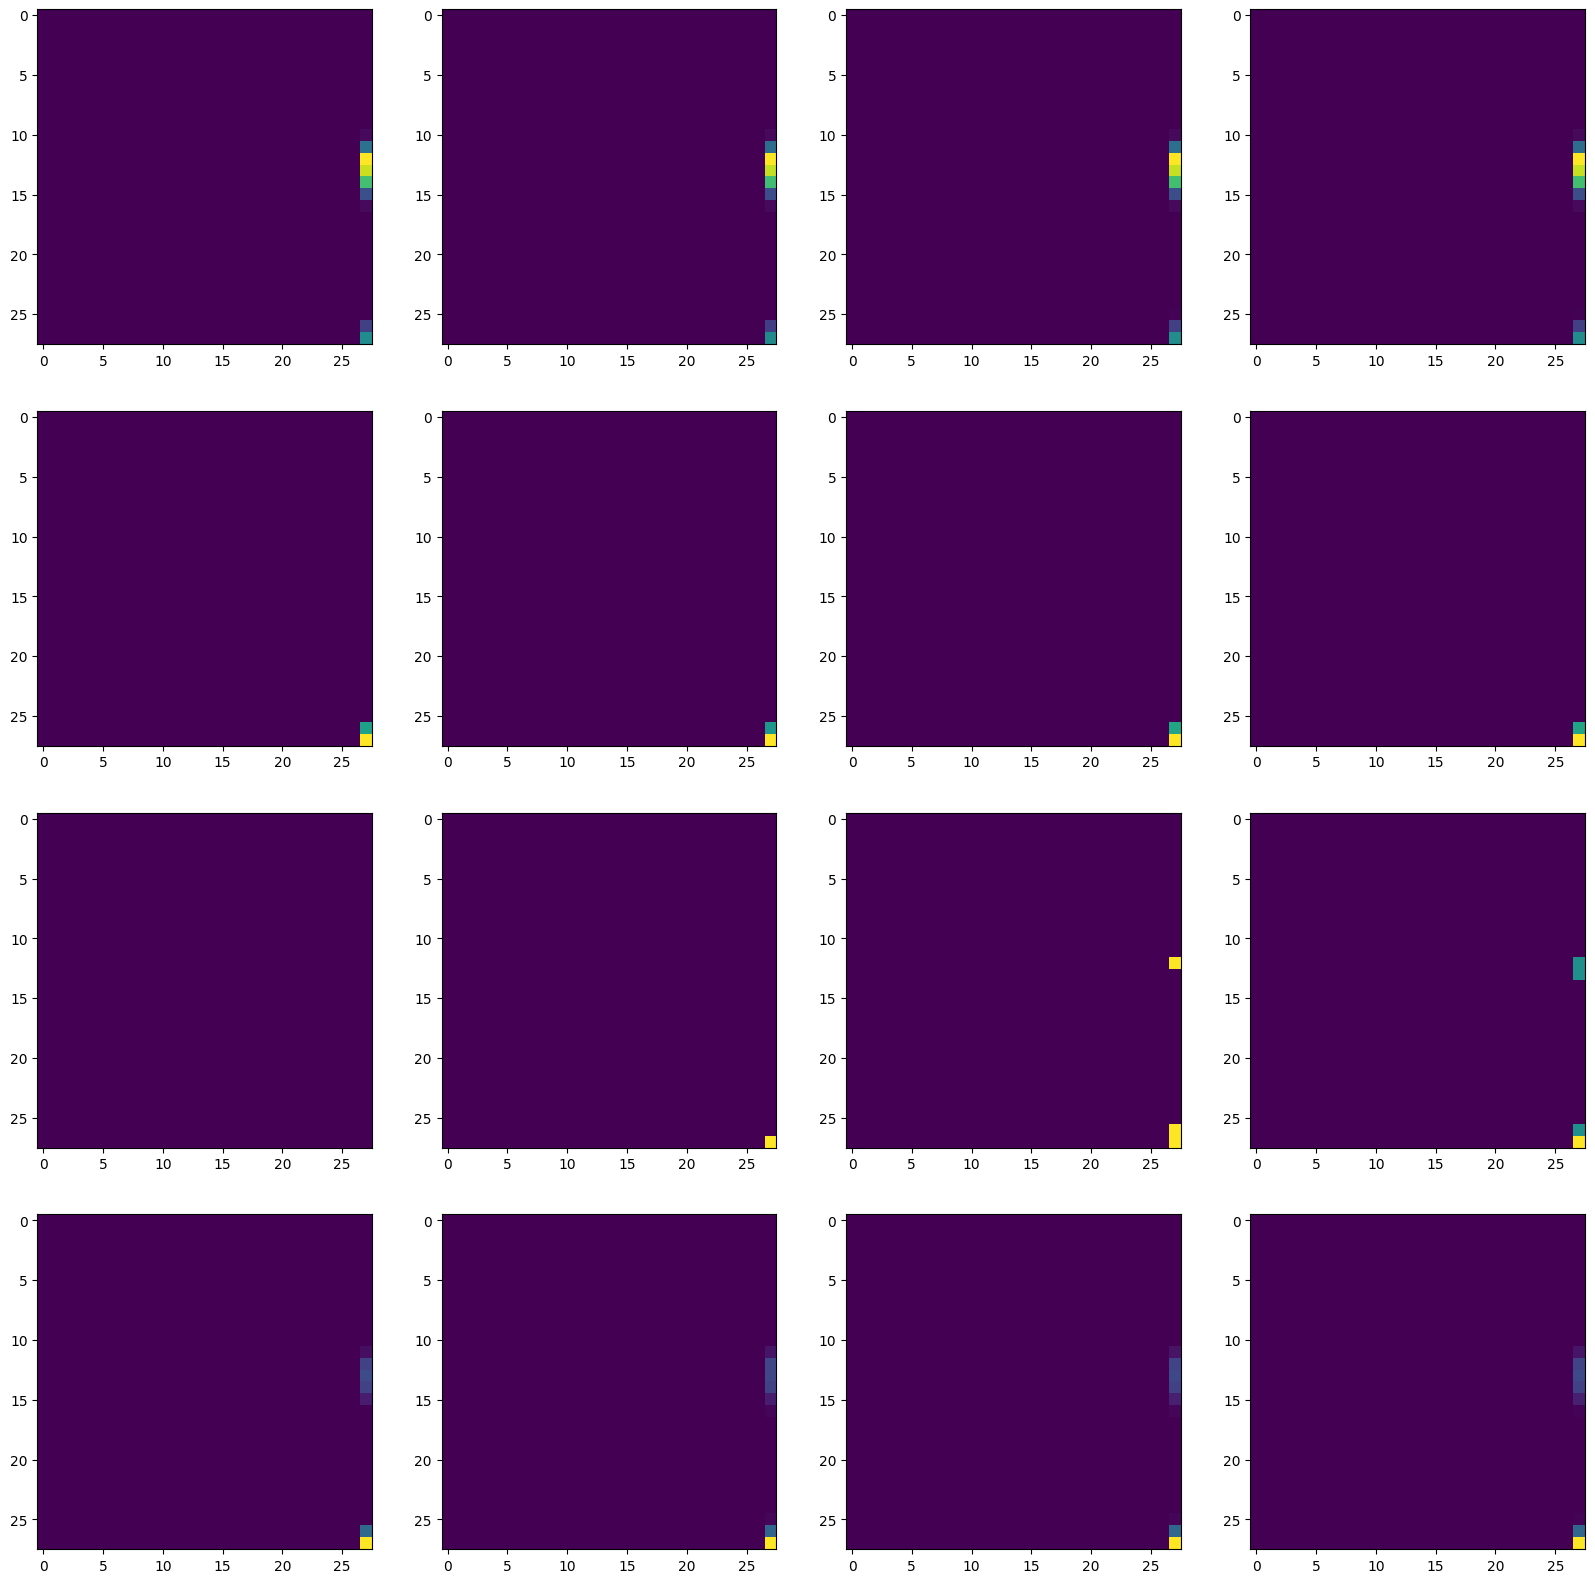

In [66]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[r+1]*(c+1)-1)

#### 5.2 Save the model

In [67]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
